# Drug Dataset Analysis

## Importing Required Libraries and Datasets

Importing Libraries

In [1]:
import pandas as pd

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\S I
[nltk_data]     Nivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing Datasets

In [ ]:
medicineDescription = pd.read_excel('workspaces/Secure-Pharmacist/Python_Model/Datasets/Medicine_Dataset.xlsx')
medicineDescription.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


## Cleaning and Analysing Dataset

Removing NA values

In [3]:
print('Before dropping:\n', medicineDescription.isna().sum())
medicineDescription = medicineDescription.dropna()
print('After dropping:\n', medicineDescription.isna().sum())

Before dropping:
 Drug_Name       0
Reason          0
Description    14
dtype: int64
After dropping:
 Drug_Name      0
Reason         0
Description    0
dtype: int64


Changing Datatypes as required

In [4]:
print(medicineDescription.dtypes)
medicineDescription['Reason'] = medicineDescription['Reason'].astype('category')
print(medicineDescription.dtypes)

Drug_Name      object
Reason         object
Description    object
dtype: object
Drug_Name        object
Reason         category
Description      object
dtype: object


Cleaning Description

In [5]:
def clean_text(Review):
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review)
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

medicineDescription['Description'] = medicineDescription['Description'].apply(clean_text)
print(medicineDescription['Description'])

0                              mild to moderate acne spots
1        a ret  is a prescription medicine that is used...
2        it is used to treat acne vulgaris in people  y...
3        it is used to treat acne vulgaris in people  y...
4         treat the most severe form of acne nodular acne 
                               ...                        
22476                              used for treating warts
22477                        used to soften the skin cells
22478                                       used for scars
22479                                      used for wounds
22480    used to treat and remove raised warts usually ...
Name: Description, Length: 22467, dtype: object


In [6]:
stop_words = set(stopwords.words('english'))
stopword = []
sentence = medicineDescription['Description'][0]

def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

medicineDescription['Keywords'] = medicineDescription['Description'].apply(lambda row: remove_stopword(stop_words, row))
print(medicineDescription['Keywords'].head())

0                        [mild, moderate, acne, spots]
1    [ret, prescription, medicine, used, reduce, fi...
2    [used, treat, acne, vulgaris, people, years, a...
3    [used, treat, acne, vulgaris, people, years, a...
4           [treat, severe, form, acne, nodular, acne]
Name: Keywords, dtype: object


# Analysis

General Analysis of Dataset

In [7]:
print(medicineDescription.shape)
print(medicineDescription.info()) # statistical calculations for numerical columns
print(medicineDescription['Reason'].unique()) # data type of each column

(22467, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22467 entries, 0 to 22480
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Drug_Name    22467 non-null  object  
 1   Reason       22467 non-null  category
 2   Description  22467 non-null  object  
 3   Keywords     22467 non-null  object  
dtypes: category(1), object(3)
memory usage: 1.3+ MB
None
['Acne', 'Adhd', 'Allergies', 'Alzheimer', 'Amoebiasis', ..., 'Thrombolysis', 'Vaccines', 'Vertigo', 'Viral', 'Wound']
Length: 51
Categories (51, object): ['Acne', 'Adhd', 'Allergies', 'Alzheimer', ..., 'Vaccines', 'Vertigo', 'Viral', 'Wound']


# Visualization

Word Cloud

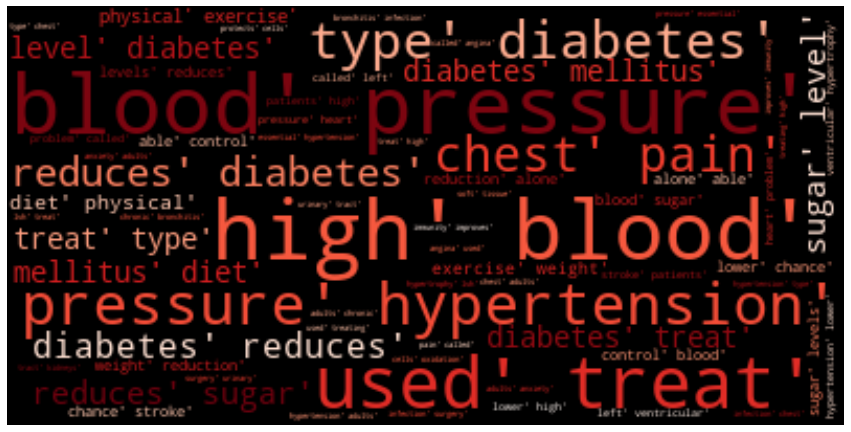

<Figure size 720x432 with 0 Axes>

In [8]:
text = " ".join(str(each) for each in medicineDescription.Keywords)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Reds', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Description: Word Cloud is a data visualization technique used for representing text data in 
which the size of each word indicates its frequency or importance. Significant 
textual data points can be highlighted using a word cloud.

Bar Chart

Supplement      3913
Pain            2852
Infection       2629
Hypertension    2505
Diabetes        2013
Fungal           878
Allergies        851
Depression       628
Anxiety          502
Anaemia          490
Name: Reason, dtype: int64

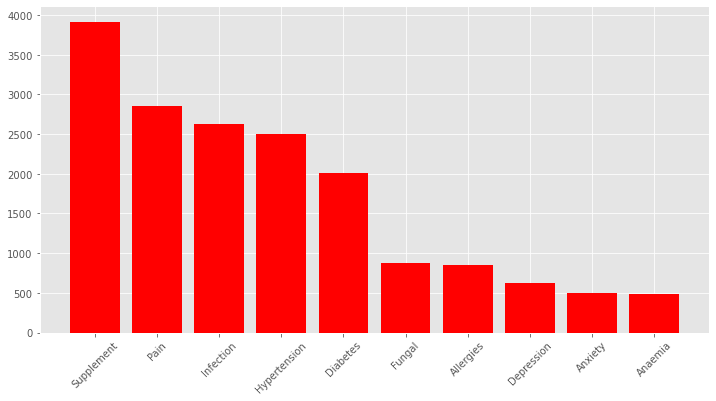

In [9]:
graph = medicineDescription.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(graph.index, graph.values, width=0.8, color='r')
plt.xticks(rotation=45)
graph

Description: This graph shows the top 10 reasons based on number of drugs available. Highest number of drugs are present for Supplements.